# Assignment #1

Please follow instruction below to complete your assingment. 
You are expected to provide:
- data files
- IPython notebook

Please use code blocks to comment and explain your code.

STUDENT ID: [27054]

#Question 1

In this network, nodes would represent the characters in the book, and edges would be the interactions between them. If two characters had a conversation or they came together in the same place, an edge can exist between them. Either the size of the nodes or their centrality can be dependent on their degrees. So, we can understand the main characters, or the most social character in the book.

At the end, I will have a social network that shows the social dynamics between the characters of the book. We can see the interactions between them, and make an analysis about the main and side characters. We can examine the distant relationship of characters who have never interacted with each other with other characters between them.

For my network, I would choose "Huzursuzluk" written by Livaneli. The top character with the highest strength would probably be "İbrahim". He get in contact a lof of characters in the book, since he investigates the reason behind his childhood friend's death. It is possible to say that he is the most social character in the book, as his investigative personality stands out and he engages in conversations with everyone to satisfy this curiosity.

Second character would be Meleknaz who escaped from the violence of ISIS from Syria, came to Mardin and married with İbrahim, then moved to Istanbul. She interacted with a lot of side characters in Syria from ISIS fighters to Yezidi people in her village. Other characters somehow heard her story. But they never met with the people she interacted with in Syria.

Third character with the highest strength would be İbrahim. Even Though Ibrahim was not alive, In his third-person narratives, Livaneli shared Ibrahim's memories abundantly with the readers. He has a story from refugee camps in Mardin to the United States. For example, he was working in a restaurant in America. He was stabbed to death there. Almost no one other than him was in interacting with the people who killed him. In addition to that, It was Ibrahim who introduced Meleknaz to his surroundings in Mardin. Therefore, Meleknaz and Ibrahim had a common network in Mardin.

#Question 2

##Part 1


expected number of edges = (10^-3) * 1000 * (1000-1) / 2

= 499.5

##Part2

In [2]:
!pip install networkx==3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [16]:
%matplotlib inline 
import os, sys
import json
import networkx as nx

# Import any other package you may need
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import pandas as pd
import json

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Erdos-Renyi network simulation

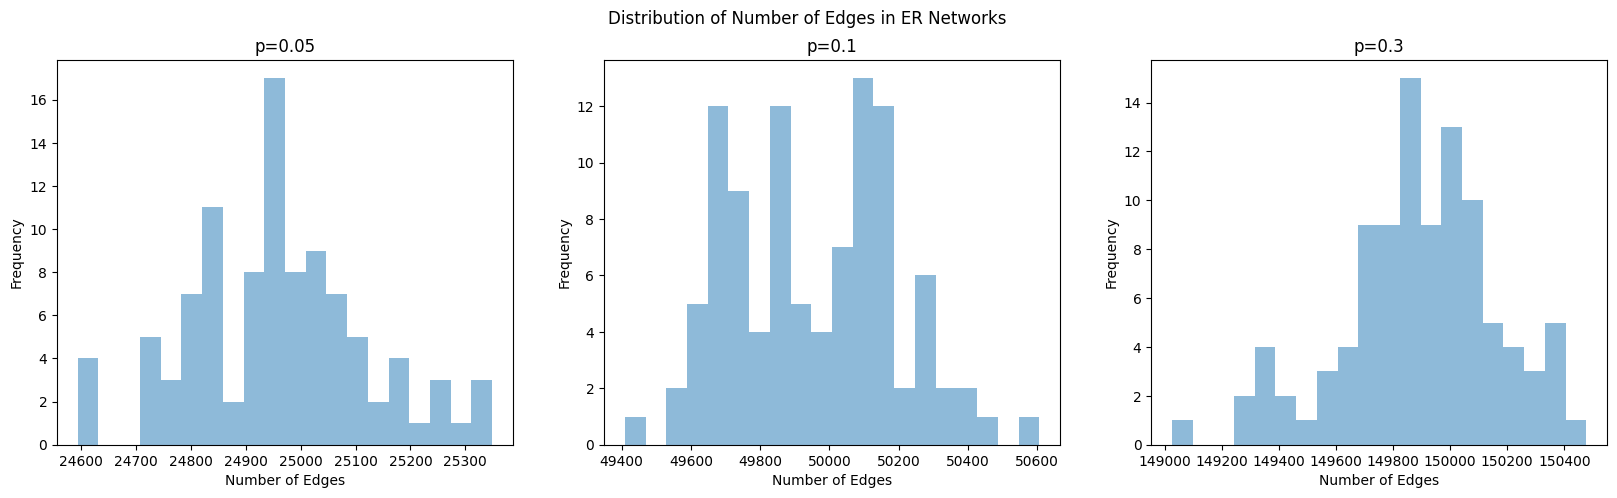

In [12]:
def simulate_erdos_renyi(N, p):
    graph = nx.Graph()
    nodes = range(N)
    graph.add_nodes_from(nodes)
    
    
    for i in nodes:
        for j in nodes:
            if i < j and random.random() < p:
                graph.add_edge(i, j)
    
    return graph

N = 1000
p_values = [0.05, 0.1, 0.3]
num_simulations = 100

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
for i, p in enumerate(p_values):
    num_edges = []
    for _ in range(num_simulations):
        graph = simulate_erdos_renyi(N, p)
        num_edges.append(graph.number_of_edges())
    axs[i].hist(num_edges, bins=20, alpha=0.5)
    axs[i].set_xlabel("Number of Edges")
    axs[i].set_ylabel("Frequency")
    axs[i].set_title(f"p={p}")

plt.suptitle("Distribution of Number of Edges in ER Networks")
plt.show()


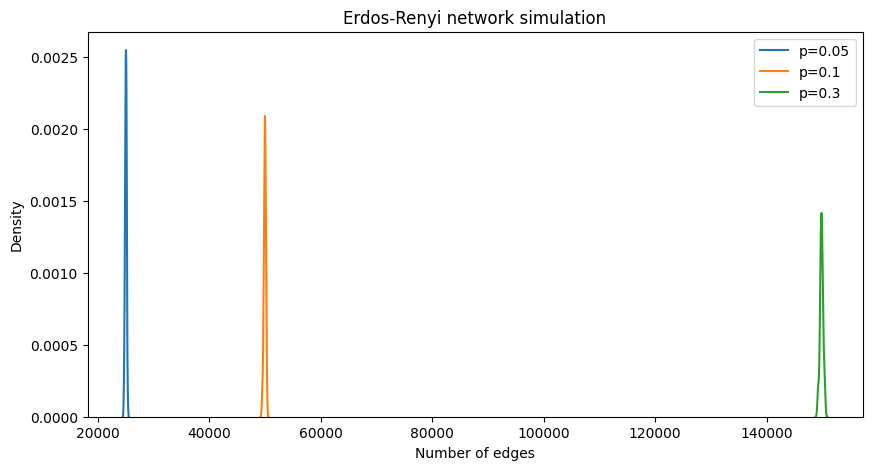

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
for p in p_values:
    num_edges = []
    for i in range(num_simulations):
        G = simulate_erdos_renyi(N, p)
        num_edges.append(G.number_of_edges())
    sns.kdeplot(num_edges, label='p={}'.format(p), ax=ax)
plt.xlabel('Number of edges')
plt.ylabel('Density')
plt.title('Erdos-Renyi network simulation')
plt.legend()
plt.show()

# Question 3

## Network generation and node properties

Request and download dataset for your own social media accounts and analyze using network science methods.

If you are not a frequnt users, you can select 3 networks with different categorical subdomains using the database below.

https://icon.colorado.edu/#!/networks

Please keep the networks smaller than 10.000 nodes.

Explore the different algorithms available on networkx for node and graph level properties.
https://networkx.org/documentation/stable/reference/algorithms/index.html

1) You should cover at least 
- node clustering coefficient, degree, strength
- graph density, largest connected components size, radius

2) Plot degree distribution. Depending on the graph topology either use linear or logarithmic scale.

3) For each edge, plot heatmap for degree of the nodes at each end and discuss whether the network is assortative or disassortative.

In [14]:
def graph_attributes(G):
    # Calculate graph density
    density = nx.density(G)
    print("Graph density:", density)

    # Calculate largest connected component size
    largest_cc = max(nx.connected_components(G), key=len)
    largest_cc_size = len(largest_cc)
    print("Largest connected component size:", largest_cc_size)

    # Calculate radius
    radius = nx.radius(G)
    print("Radius:", radius)

In [15]:
def plot_degree_distribution(a, width=0.5):
    """
    Plots the degree distribution of a network.
    :param a: networkx graph object
    :param width: width of the histogram bars, default 0.5
    """
    degrees = nx.degree_histogram(a)
    plt.hist(degrees, bins=len(degrees), width=width)
    plt.title("Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.show()

##Dataset 1 - Gallery proximity network (2009)

### Network analysis

In [39]:
# Create an empty undirected multigraph
H = nx.MultiGraph()

# Open the file for reading
with open('/content/drive/My Drive/out.sociopatterns-infectious', 'r') as file:
    # Skip the first two lines
    next(file)
    next(file)
    # Loop over the remaining lines
    for line in file:
        # Split the line into a list of values
        values = line.strip().split()
        # Extract the from node, to node, and edge weight (if present)
        from_node = int(values[0])
        to_node = int(values[1])
        if len(values) == 4:
            weight = int(values[2])
            timestamp = int(values[3])
            # Add the edges to the undirected multigraph in both directions
            H.add_edge(from_node, to_node, weight=weight, timestamp=timestamp)
            
        else:
            # Add the edges to the undirected multigraph in both directions with default weight of 1
            H.add_edge(from_node, to_node)
            

print('Number of nodes', len(H.nodes))
print('Number of edges', len(H.edges))
print('Average degree', sum(dict(H.degree).values()) / len(H.nodes))

Number of nodes 410
Number of edges 17298
Average degree 84.38048780487804


In [40]:
graph_attributes(H)

Graph density: 0.20630926113662115
Largest connected component size: 410
Radius: 5


In [41]:
attributes = {
    "degree centrality": nx.degree_centrality,
}
nodeCentralities = dict()
for ctype, cfunc in attributes.items():
  resp = cfunc(H)
  for k,v in resp.items():
    if k not in nodeCentralities:
      nodeCentralities[k] = dict()
    nodeCentralities[k][ctype] = v

for n, cent in nodeCentralities.items():
  for k,v in cent.items():
    H.nodes[n][k] = v

attributes_converted = {
    "node clustering coefficient": nx.clustering,
    "eigenvector_centrality": nx.eigenvector_centrality,
    "degree": nx.degree_centrality,
    "closeness_centrality": nx.closeness_centrality,
    "betweenness_centrality": nx.betweenness_centrality,
    "subgraph_centrality": nx.subgraph_centrality
}
for ctype, cfunc in attributes_converted.items():
  resp = cfunc(nx.Graph(H))
  for k,v in resp.items():
    if k not in nodeCentralities:
      nodeCentralities[k] = dict()
    nodeCentralities[k][ctype] = v

for n, cent in nodeCentralities.items():
  for k,v in cent.items():
    H.nodes[n][k] = v

In [42]:
nx.write_gexf(H, "/content/drive/My Drive/graphOne.gexf")

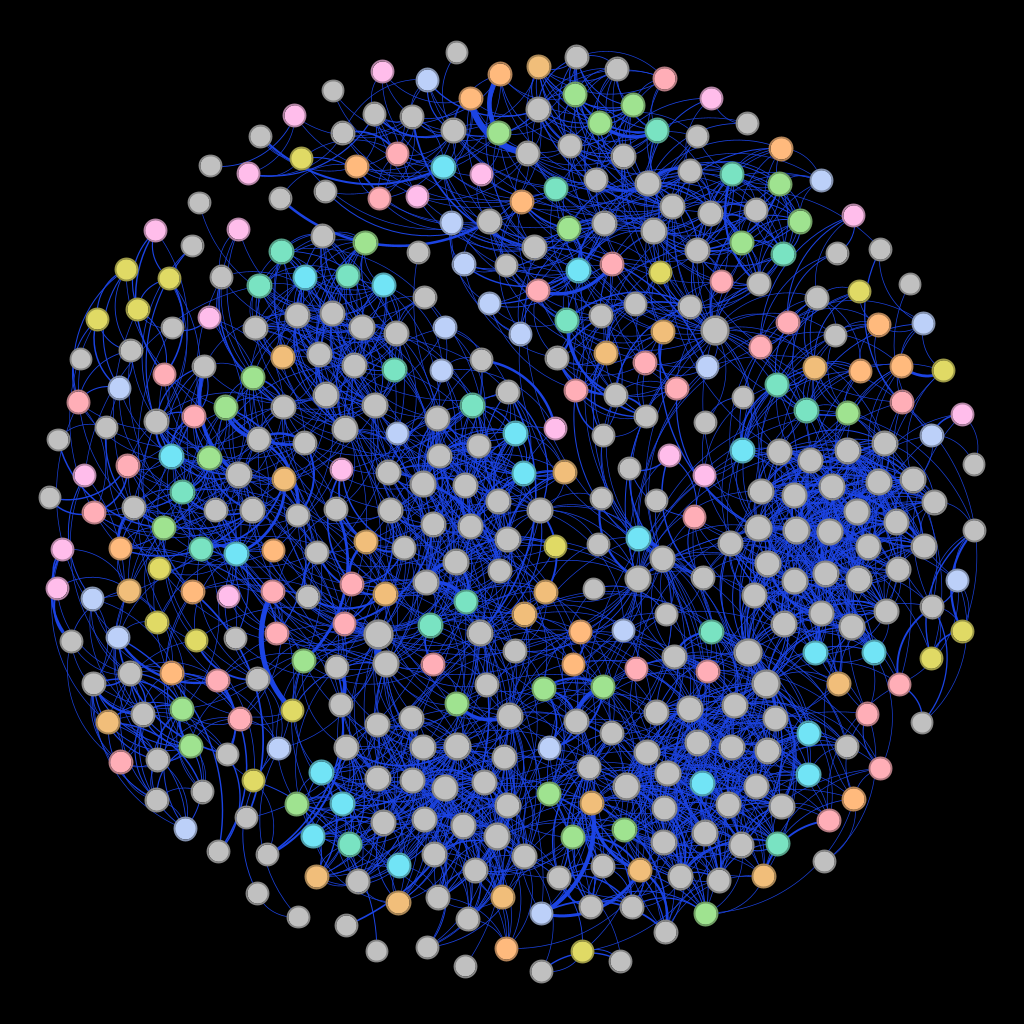

### Plot degree distribution

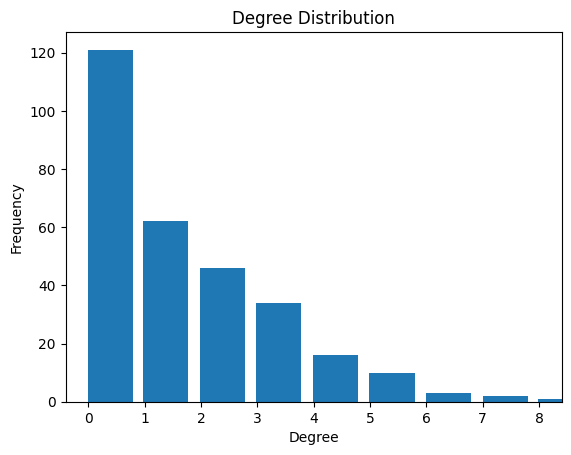

In [43]:
plot_degree_distribution(H, width=0.8)

### Assortativeness analysis

In [44]:
print("Assortativity coefficient: ", nx.degree_assortativity_coefficient(H))

Assortativity coefficient:  0.49640000103682697


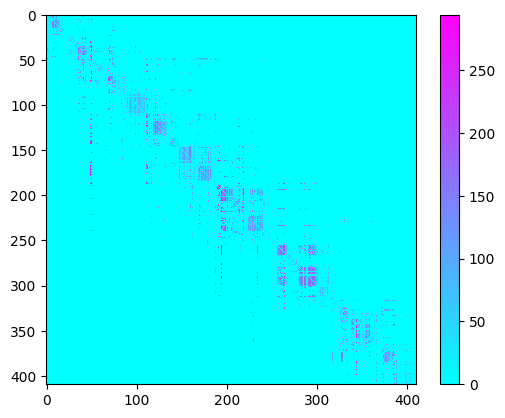

In [45]:
# calculate the degree of each node in G
degrees = dict(H.degree())

# create a matrix where each row and column represents a node
matrix = np.zeros((len(H.nodes), len(H.nodes)))

# fill in the matrix with the degree of the nodes at each end of each edge
for edge in H.edges:
    matrix[edge[0]-1][edge[1]-1] = degrees[edge[1]]
    matrix[edge[1]-1][edge[0]-1] = degrees[edge[0]]

# plot the heatmap
plt.imshow(matrix, cmap='cool', interpolation='nearest')
plt.colorbar()
plt.show()

Since the assortativity coefficient is positive and can be seen from the heatmap, it is possible to say that the graph is assortative.

##Dataset 2 - Contiguous states (USA)

### Network analysis

In [46]:
G = nx.Graph()
# Open the file for reading
with open('/content/drive/My Drive/out.contiguous-usa', 'r') as file:
    # Skip the first three lines
    next(file)
    next(file)
    # Loop over the remaining lines
    for line in file:
        # Split the line into a list of values
        values = line.strip().split()
        from_node = int(values[0])
        to_node = int(values[1])
        G.add_edge(from_node, to_node)
            

print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 49
Number of edges 107
Average degree 4.36734693877551


In [47]:
graph_attributes(G)

Graph density: 0.09098639455782313
Largest connected component size: 49
Radius: 6


In [48]:
attributes = {
     "node clustering coefficient": nx.clustering,
    "eigenvector_centrality": nx.eigenvector_centrality,
    "degree": nx.degree_centrality,
    "closeness_centrality": nx.closeness_centrality,
    "betweenness_centrality": nx.betweenness_centrality,
    "subgraph_centrality": nx.subgraph_centrality
}
nodeCentralities = dict()
for ctype, cfunc in attributes.items():
  resp = cfunc(G)
  for k,v in resp.items():
    if k not in nodeCentralities:
      nodeCentralities[k] = dict()
    nodeCentralities[k][ctype] = v

for n, cent in nodeCentralities.items():
  for k,v in cent.items():
    G.nodes[n][k] = v

In [49]:
nx.write_gexf(G, "/content/drive/My Drive/graphTwo.gexf")

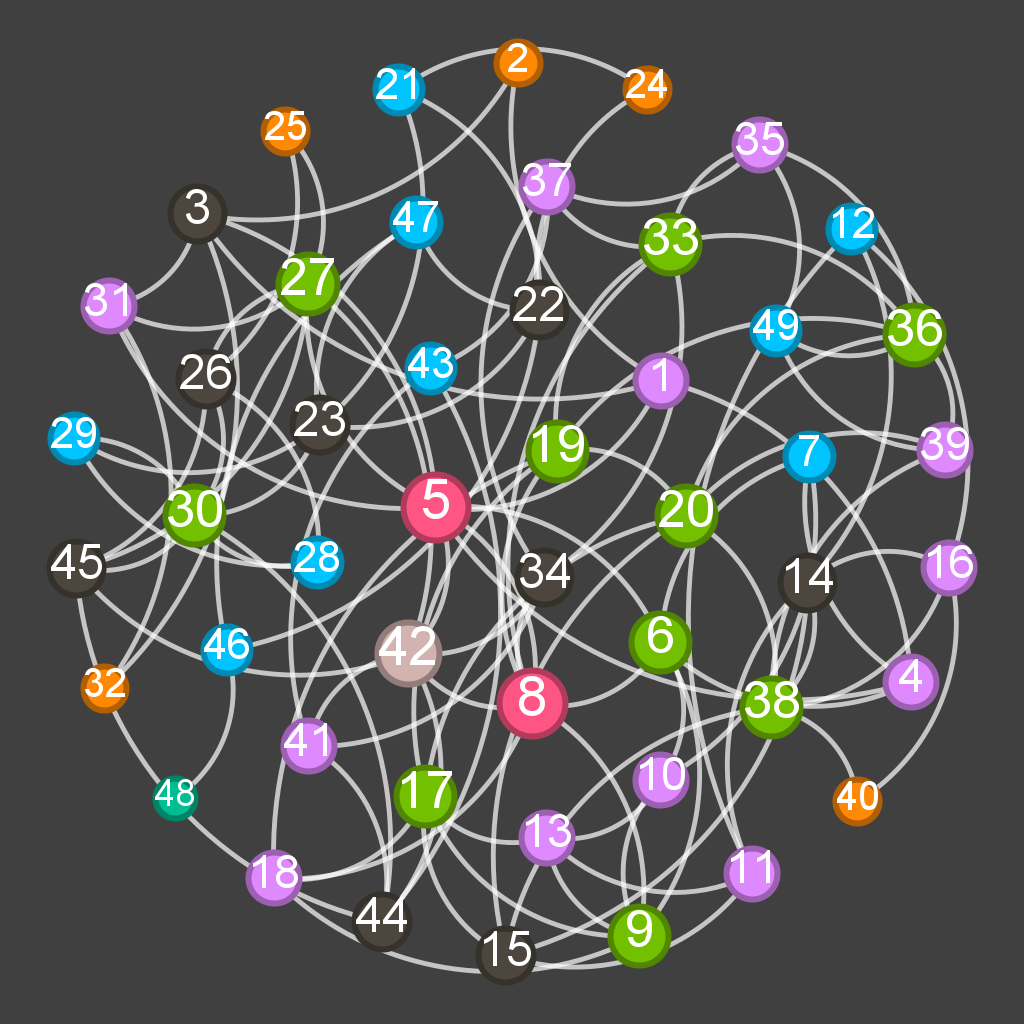

### Plot degree distribution

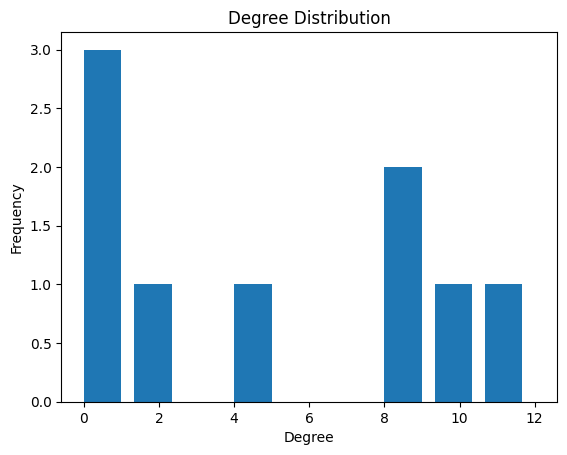

In [50]:
plot_degree_distribution(G, width=1.0)

### Assortativeness analysis

In [51]:
print("Assortativity coefficient: ", nx.degree_assortativity_coefficient(G))

Assortativity coefficient:  0.23339651250947788


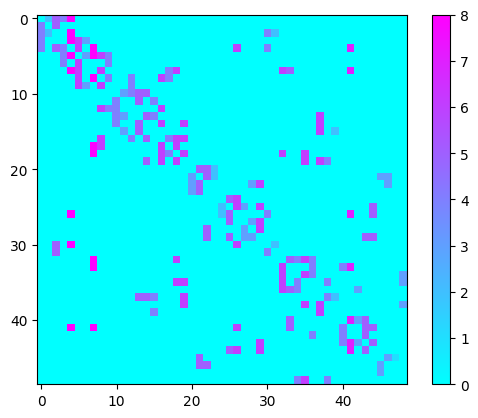

In [52]:
# calculate the degree of each node in G
degrees = dict(G.degree())

# create a matrix where each row and column represents a node
matrix = np.zeros((len(G.nodes), len(G.nodes)))

# fill in the matrix with the degree of the nodes at each end of each edge
for edge in G.edges:
    matrix[edge[0]-1][edge[1]-1] = degrees[edge[1]]
    matrix[edge[1]-1][edge[0]-1] = degrees[edge[0]]

# plot the heatmap
plt.imshow(matrix, cmap='cool', interpolation='nearest')
plt.colorbar()
plt.show()

Since the assortativity coefficient is positive and can be seen from the heatmap, it is possible to say that the graph is assortative.

##Dataset 3 - Star Wars coappearances

### Network analysis

In [53]:
with open('/content/drive/My Drive/starwars-episode-1-mentions.json') as f:
    data = json.load(f)

Q = nx.Graph()

# Extract the "links" array from the JSON data
links = data['links']

# Loop through the "links" array and print the values of "source", "target", and "value"
for link in links:
    from_node = link['source']
    to_node = link['target']
    value = link["value"]

    Q.add_edge(from_node, to_node, weight="value")

In [54]:
print('Number of nodes', len(Q.nodes))
print('Number of edges', len(Q.edges))
print('Average degree', sum(dict(Q.degree).values()) / len(Q.nodes))

Number of nodes 38
Number of edges 244
Average degree 12.842105263157896


In [55]:
graph_attributes(Q)

Graph density: 0.34708392603129445
Largest connected component size: 38
Radius: 2


In [56]:
attributes = {
    "node clustering coefficient": nx.clustering,
    "eigenvector_centrality": nx.eigenvector_centrality,
    "degree": nx.degree_centrality,
    "closeness_centrality": nx.closeness_centrality,
    "betweenness_centrality": nx.betweenness_centrality,
}
nodeCentralities = dict()
for ctype, cfunc in attributes.items():
  resp = cfunc(Q)
  for k,v in resp.items():
    if k not in nodeCentralities:
      nodeCentralities[k] = dict()
    nodeCentralities[k][ctype] = v

for n, cent in nodeCentralities.items():
  for k,v in cent.items():
    Q.nodes[n][k] = v

In [57]:
nx.write_gexf(Q, "/content/drive/My Drive/graphTree.gexf")

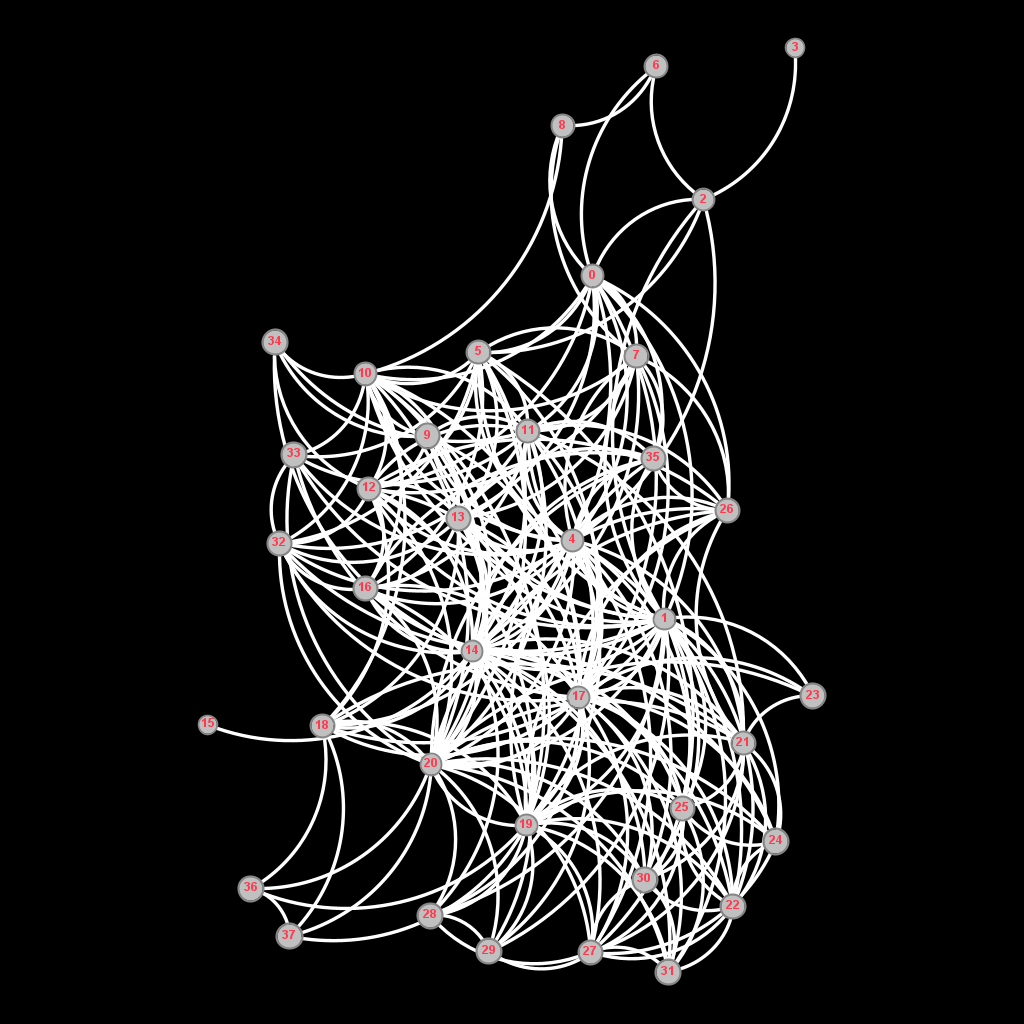

### Plot degree distribution

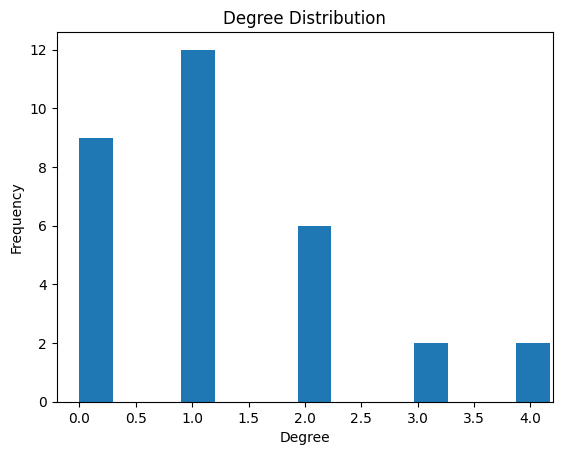

In [58]:
plot_degree_distribution(Q, width=0.3)

### Assortativeness analysis

In [59]:
print("Assortativity coefficient: ", nx.degree_assortativity_coefficient(Q))

Assortativity coefficient:  -0.2560626493728298


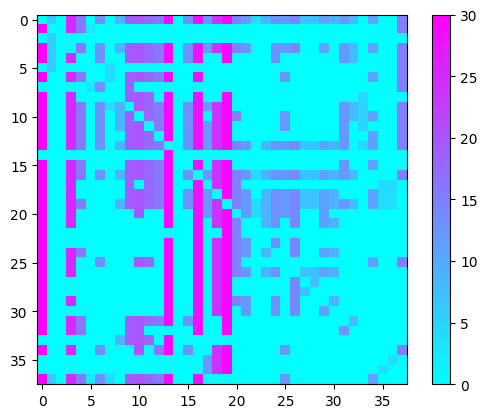

In [60]:
# calculate the degree of each node in Q
degrees = dict(Q.degree())

# create a matrix where each row and column represents a node
matrix = np.zeros((len(Q.nodes), len(Q.nodes)))

# fill in the matrix with the degree of the nodes at each end of each edge
for edge in Q.edges:
    matrix[edge[0]-1][edge[1]-1] = degrees[edge[1]]
    matrix[edge[1]-1][edge[0]-1] = degrees[edge[0]]

# plot the heatmap
plt.imshow(matrix, cmap='cool', interpolation='nearest')
plt.colorbar()
plt.show()

Since the assortativity coefficient is negative and can be seen from the heatmap, it is possible to say that the graph is disassortative.

#Question 4

## Cayley tree

You can find more information about Cayley tree or bethe lattice below

https://en.wikipedia.org/wiki/Bethe_lattice

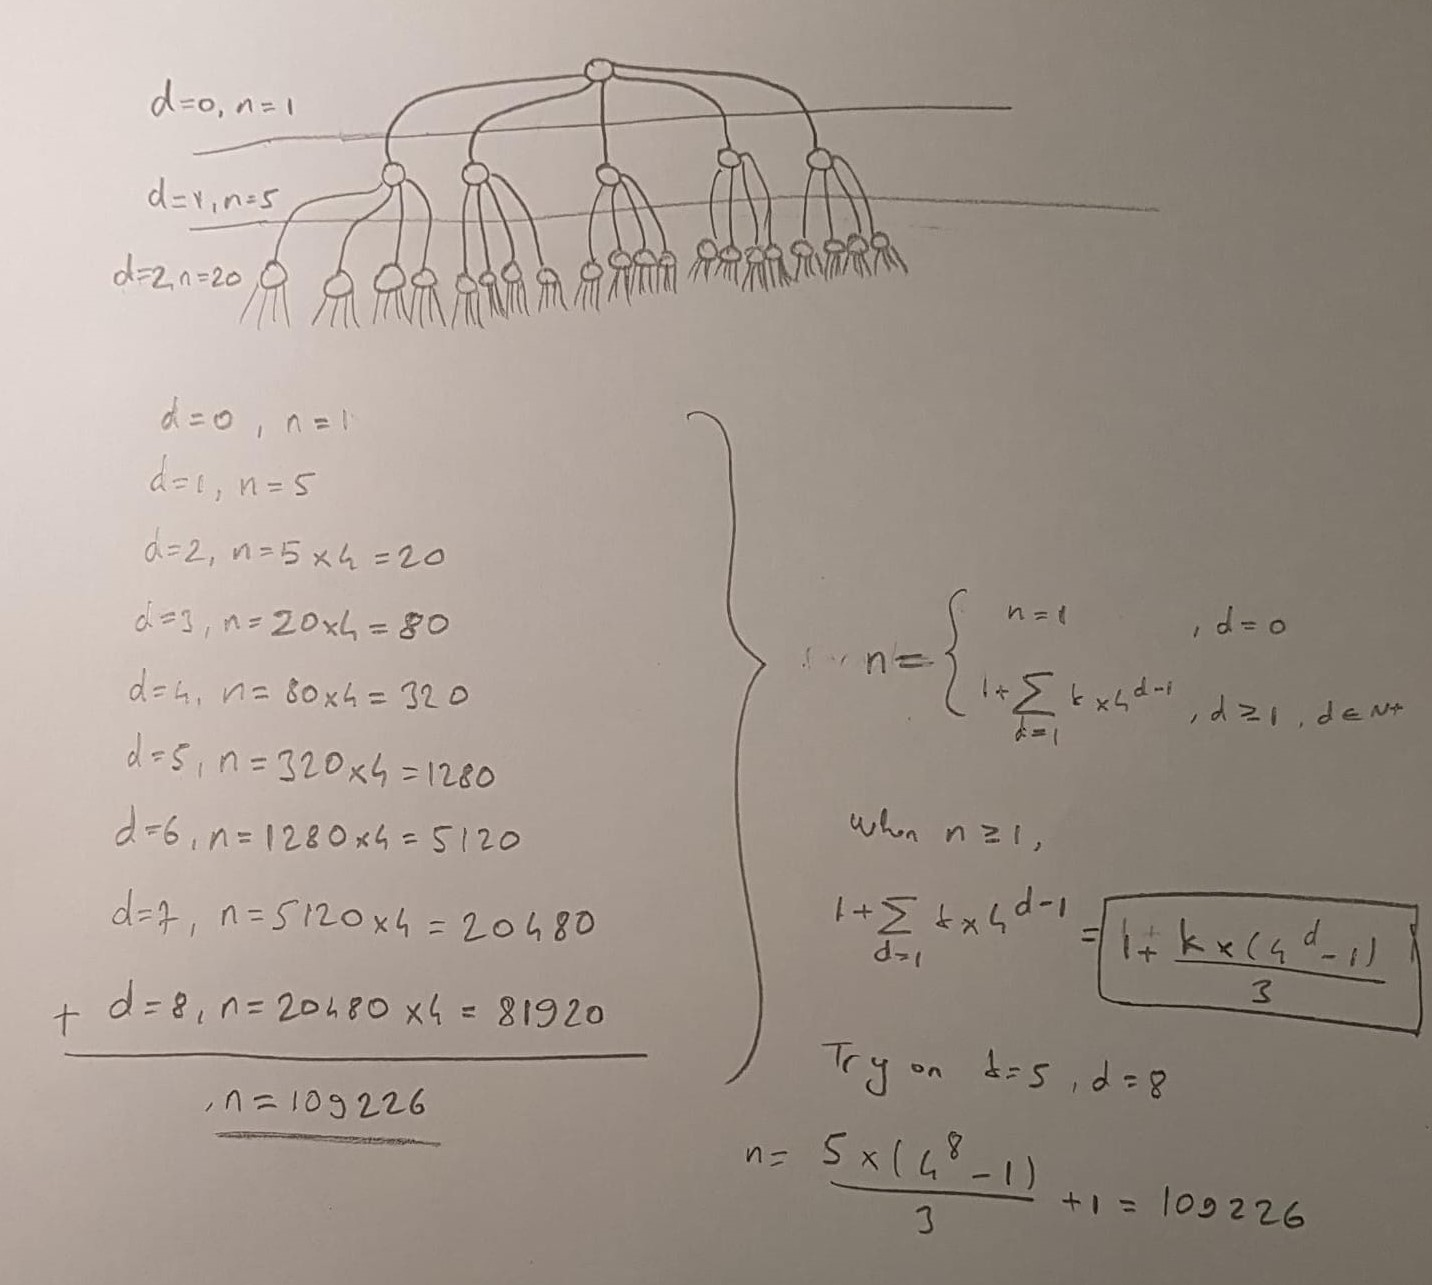